In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

In [49]:
country_translation = {
    "PORTUGAL": "Portugal",
    "REINO UNIDO": "United Kingdom",
    "SUÍÇA": "Switzerland",
    "UNKNOWN": "Unknown",
    "URUGUAI": "Uruguay",
    "VENEZUELA": "Venezuela",
    "ÁFRICA DO SUL": "South Africa",
    "ARGENTINA": "Argentina",
    "BOLÍVIA": "Bolivia",
    "BRASIL": "Brazil",
    "CHILE": "Chile",
    "ESPANHA": "Spain",
    "ESTADOS UNIDOS DA AMÉRICA": "United States",
    "FRANÇA": "France",
    "GUIANA": "Guyana",
    "HOLANDA": "Netherlands",
    "ILHAS FEROÉ": "Faroe Islands",
    "JAPÃO": "Japan",
    "MÉXICO": "Mexico",
    "PANAMÁ": "Panama",
    "PARAGUAI": "Paraguay",
    "SURINAME": "Suriname",
    "COLÔMBIA": "Colombia",
    "GUIANA FRANCESA": "French Guiana",
    "ITÁLIA": "Italy",
    "ALEMANHA": "Germany",
    "ANGOLA": "Angola",
    "CANADÁ": "Canada",
    "CUBA": "Cuba",
    "PERU": "Peru"
}

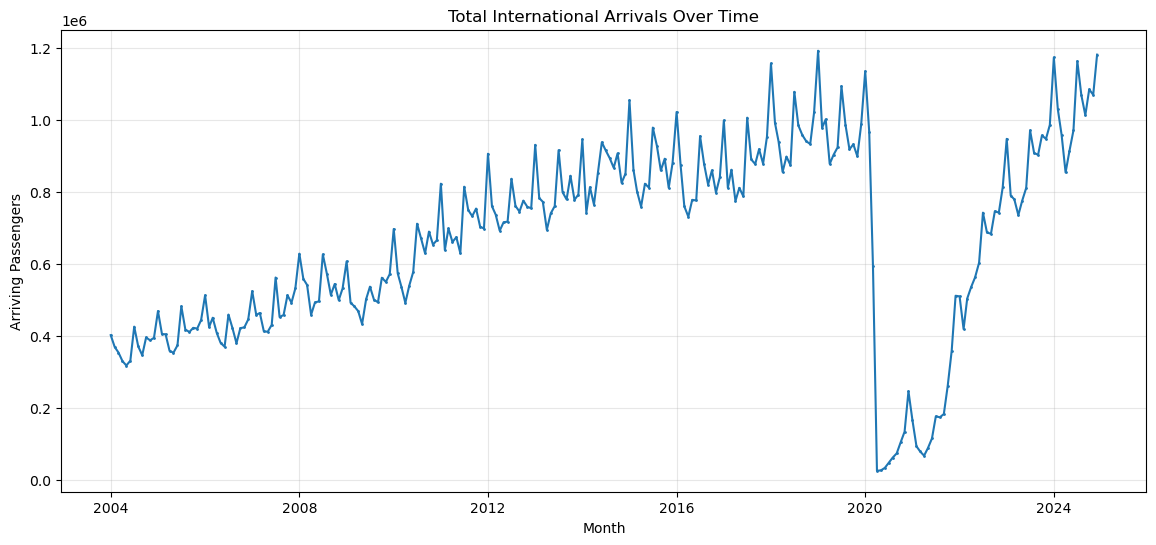

In [50]:
# Load your processed data
df = pd.read_csv("intl_arrivals_by_region_country.csv")

# Convert year_month to datetime
df["year_month"] = pd.to_datetime(df["year_month"])
df["origin_country_en"] = df["origin_country"].map(country_translation).fillna(df["origin_country"])

df = df[(df["origin_country_en"] != "UNKNOWN") & (df["destination_region"] != "UNKNOWN")]
df["origin_country_en"] = df["origin_country"].map(country_translation).fillna(df["origin_country"])


# Aggregate by month
monthly_totals = df.groupby("year_month")["arriving_passengers"].sum()

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_totals.index, monthly_totals.values, marker="o", markersize=1)
plt.title("Total International Arrivals Over Time")
plt.xlabel("Month")
plt.ylabel("Arriving Passengers")
plt.grid(True, alpha=0.3)
plt.show()

In [51]:
df

,year_month,destination_region,origin_country,arriving_passengers,origin_country_en
0,2004-01-01,Central-West,ARGENTINA,314,Argentina
1,2004-01-01,North,ARUBA,93,ARUBA
2,2004-01-01,North,BOLÍVIA,135,Bolivia
3,2004-01-01,North,COLÔMBIA,211,Colombia
4,2004-01-01,North,ESTADOS UNIDOS DA AMÉRICA,1036,United States
...,...,...,...,...,...
18348,2024-12-01,Southeast,REPÚBLICA DOMINICANA,7200,REPÚBLICA DOMINICANA
18349,2024-12-01,Southeast,SUÍÇA,8283,Switzerland
18350,2024-12-01,Southeast,TURQUIA,7622,TURQUIA
18351,2024-12-01,Southeast,URUGUAI,22046,Uruguay


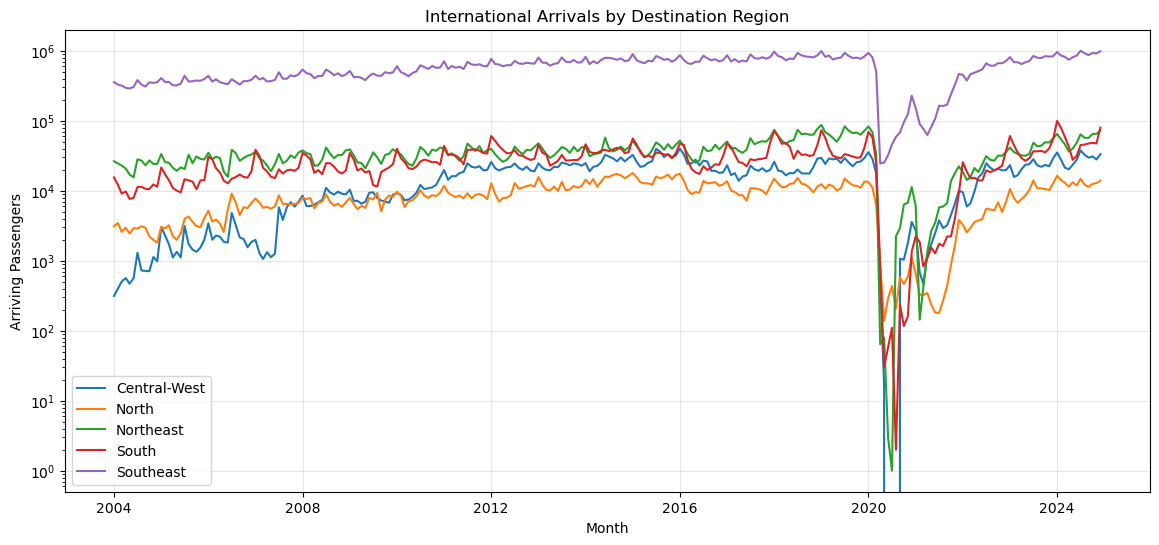

In [46]:
region_totals = df.groupby(["year_month", "destination_region"])["arriving_passengers"].sum().reset_index()

plt.figure(figsize=(14,6))
for region, group in region_totals.groupby("destination_region"):
    plt.plot(pd.to_datetime(group["year_month"]), group["arriving_passengers"], label=region)
plt.yscale("log")
plt.title("International Arrivals by Destination Region")
plt.xlabel("Month")
plt.ylabel("Arriving Passengers")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

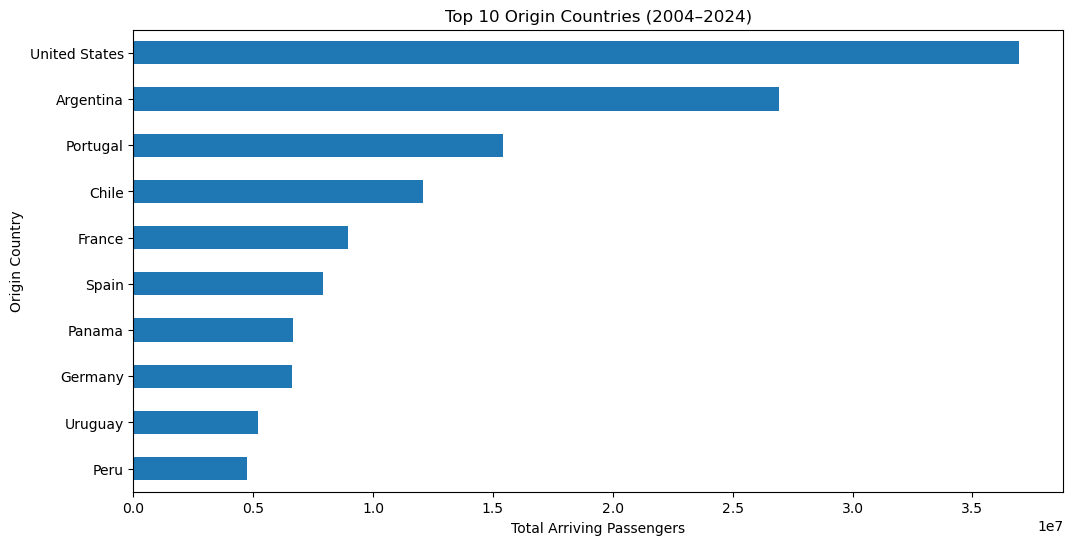

In [53]:
top_countries = df.groupby("origin_country_en")["arriving_passengers"].sum().nlargest(10).index

plt.figure(figsize=(12,6))
df[df["origin_country_en"].isin(top_countries)].groupby("origin_country_en")["arriving_passengers"].sum().sort_values().plot(kind="barh")
plt.title("Top 10 Origin Countries (2004–2024)")
plt.xlabel("Total Arriving Passengers")
plt.ylabel("Origin Country")
plt.show()

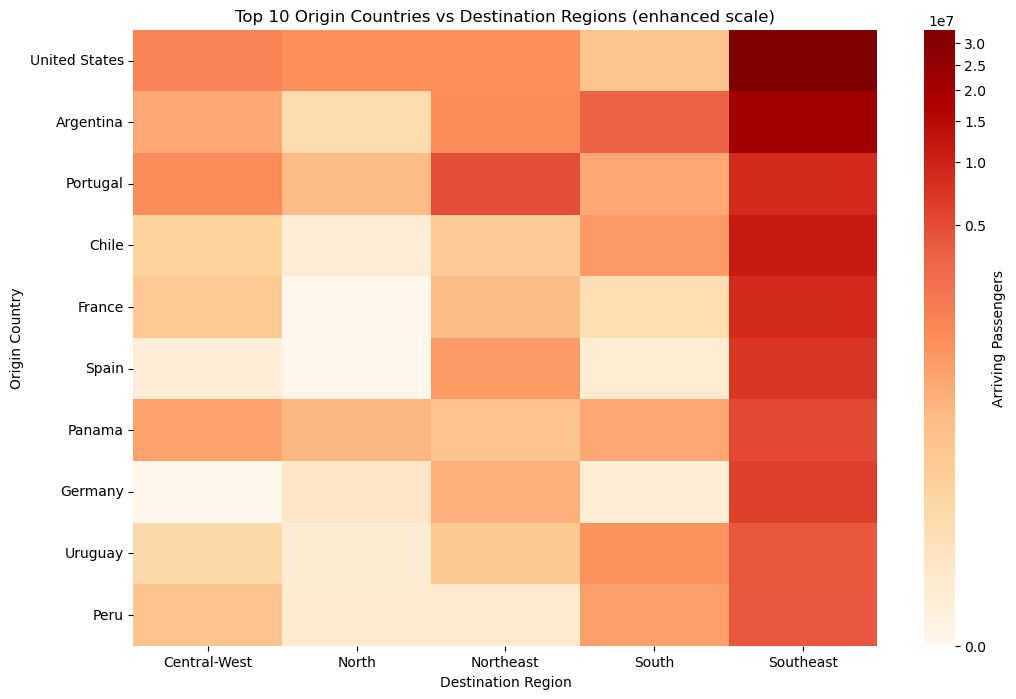

In [58]:
pivot = df.pivot_table( index="origin_country_en", columns="destination_region", values="arriving_passengers", aggfunc="sum", fill_value=0 ) 
top10 = pivot.sum(axis=1).nlargest(10).index 
pivot_top10 = pivot.loc[top10]

plt.figure(figsize=(12,8))
sns.heatmap(
    pivot_top10,
    annot=False,
    cmap="OrRd",
    norm=PowerNorm(0.2),  # adjust gamma <1 to enhance low values
    cbar_kws={"label": "Arriving Passengers"}
)
plt.title("Top 10 Origin Countries vs Destination Regions (enhanced scale)")
plt.ylabel("Origin Country")
plt.xlabel("Destination Region")
plt.show()


<Figure size 1400x600 with 0 Axes>

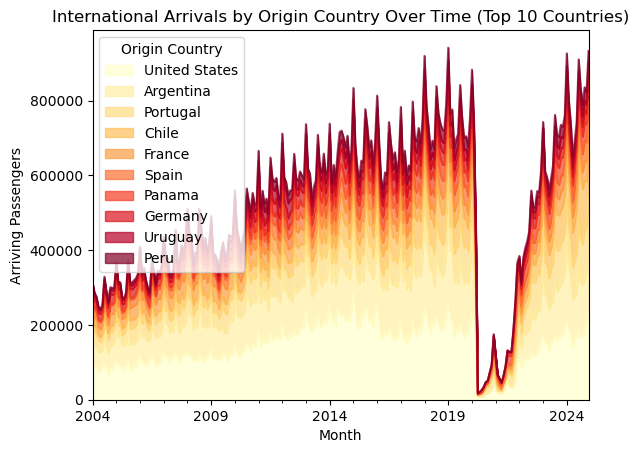

In [59]:
# Make sure year_month is datetime
df["year_month"] = pd.to_datetime(df["year_month"])

# Remove UNKNOWN rows
df_clean = df[(df["origin_country_en"] != "Unknown") & (df["destination_region"] != "UNKNOWN")]

# Aggregate passengers by month and origin country
area_totals = df_clean.groupby(["year_month", "origin_country_en"])["arriving_passengers"].sum().unstack(fill_value=0)

# Optional: keep top 10 countries by total passengers
top10_countries = area_totals.sum(axis=0).nlargest(10).index
area_totals_top10 = area_totals[top10_countries]

# Plot stacked area chart
plt.figure(figsize=(14,6))
area_totals_top10.plot.area(colormap="YlOrRd", alpha=0.7)
plt.title("International Arrivals by Origin Country Over Time (Top 10 Countries)")
plt.xlabel("Month")
plt.ylabel("Arriving Passengers")
plt.legend(title="Origin Country")
plt.show()

<Figure size 1400x600 with 0 Axes>

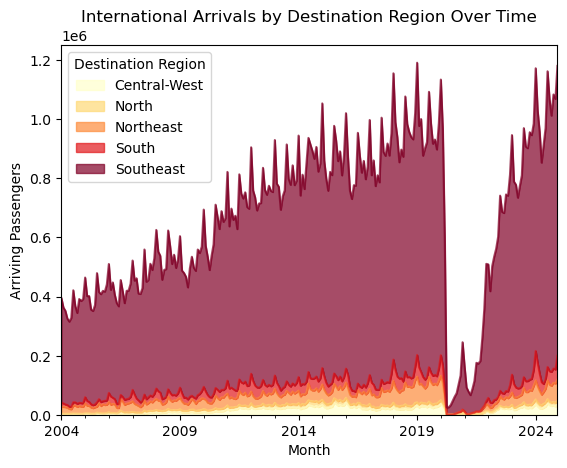

In [60]:
# Ensure year_month is datetime
df["year_month"] = pd.to_datetime(df["year_month"])

# Remove UNKNOWN rows
df_clean = df[(df["origin_country_en"] != "Unknown") & (df["destination_region"] != "UNKNOWN")]

# Aggregate passengers by month and destination region
area_totals = df_clean.groupby(["year_month", "destination_region"])["arriving_passengers"].sum().unstack(fill_value=0)

# Plot stacked area chart
plt.figure(figsize=(14,6))
area_totals.plot.area(colormap="YlOrRd", alpha=0.7)
plt.title("International Arrivals by Destination Region Over Time")
plt.xlabel("Month")
plt.ylabel("Arriving Passengers")
plt.legend(title="Destination Region")
plt.show()
